This is this sixth in a series of notebooks designed to show you how to analyze social media data. For demonstration purposes we are looking at tweets sent by CSR-related Twitter accounts -- accounts related to ethics, equality, the environment, etc. -- of Fortune 200 firms in 2013. I assume you have already downloaded the data and have completed the steps taken in <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%201%20-%20Import%20Data%2C%20Select%20Cases%20and%20Variables%2C%20Save%20DataFrame.ipynb" target="_blank">Chapter 1</a>,  <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%202%20-%20Aggregating%20and%20Analyzing%20Data%20by%20Twitter%20Account.ipynb" target="_blank">Chapter 2</a>, <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%203%20-%20Analyzing%20Twitter%20Data%20by%20Time%20Period.ipynb" target="_blank">Chapter 3</a>, <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%204%20-%20Analyzing%20Hashtags.ipynb" target="_blank">Chapter 4</a>, and <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%205%20-%20Generating%20New%20Variables.ipynb" target="_blank">Chapter 5</a>. In this notebook I will show you how to run and then save for output your descriptive statistics. The desired end product is the a CSV table of key <i>summary statistics</i> -- count, mean, std. dev., min. and max -- for the variables in your dataset. 

Also known as <i>descriptive statistics</i>, summary statistics are crucial for helping readers understand the nature of your data, especially for helping convey the range and dispersion of your data. A summary statistics table is mandatory in some journals and some disciplines whenever one is presenting statistical analyses of quantitative data. Below is an example of a summary statistics table from an article <a href="https://twitter.com/chaoguo1" target="_blank">Chao Guo</a> and I published last year on 150 nonprofit advocacy organizations' use of Twitter:

 - Guo, C., & Saxton, G. D. (2014). <a href="https://www.academia.edu/3245466/Tweeting_Social_Change_How_Social_Media_are_Changing_Nonprofit_Advocacy" target="_blank">Tweeting social change: How social media are changing nonprofit advocacy</a>. <i>Nonprofit & Voluntary Sector Quarterly, 43</i>, 57-79.
 
As you can see, the table shows the count, mean, std. dev., and minimum and maximum values for each quantitative variable in our analyses. 

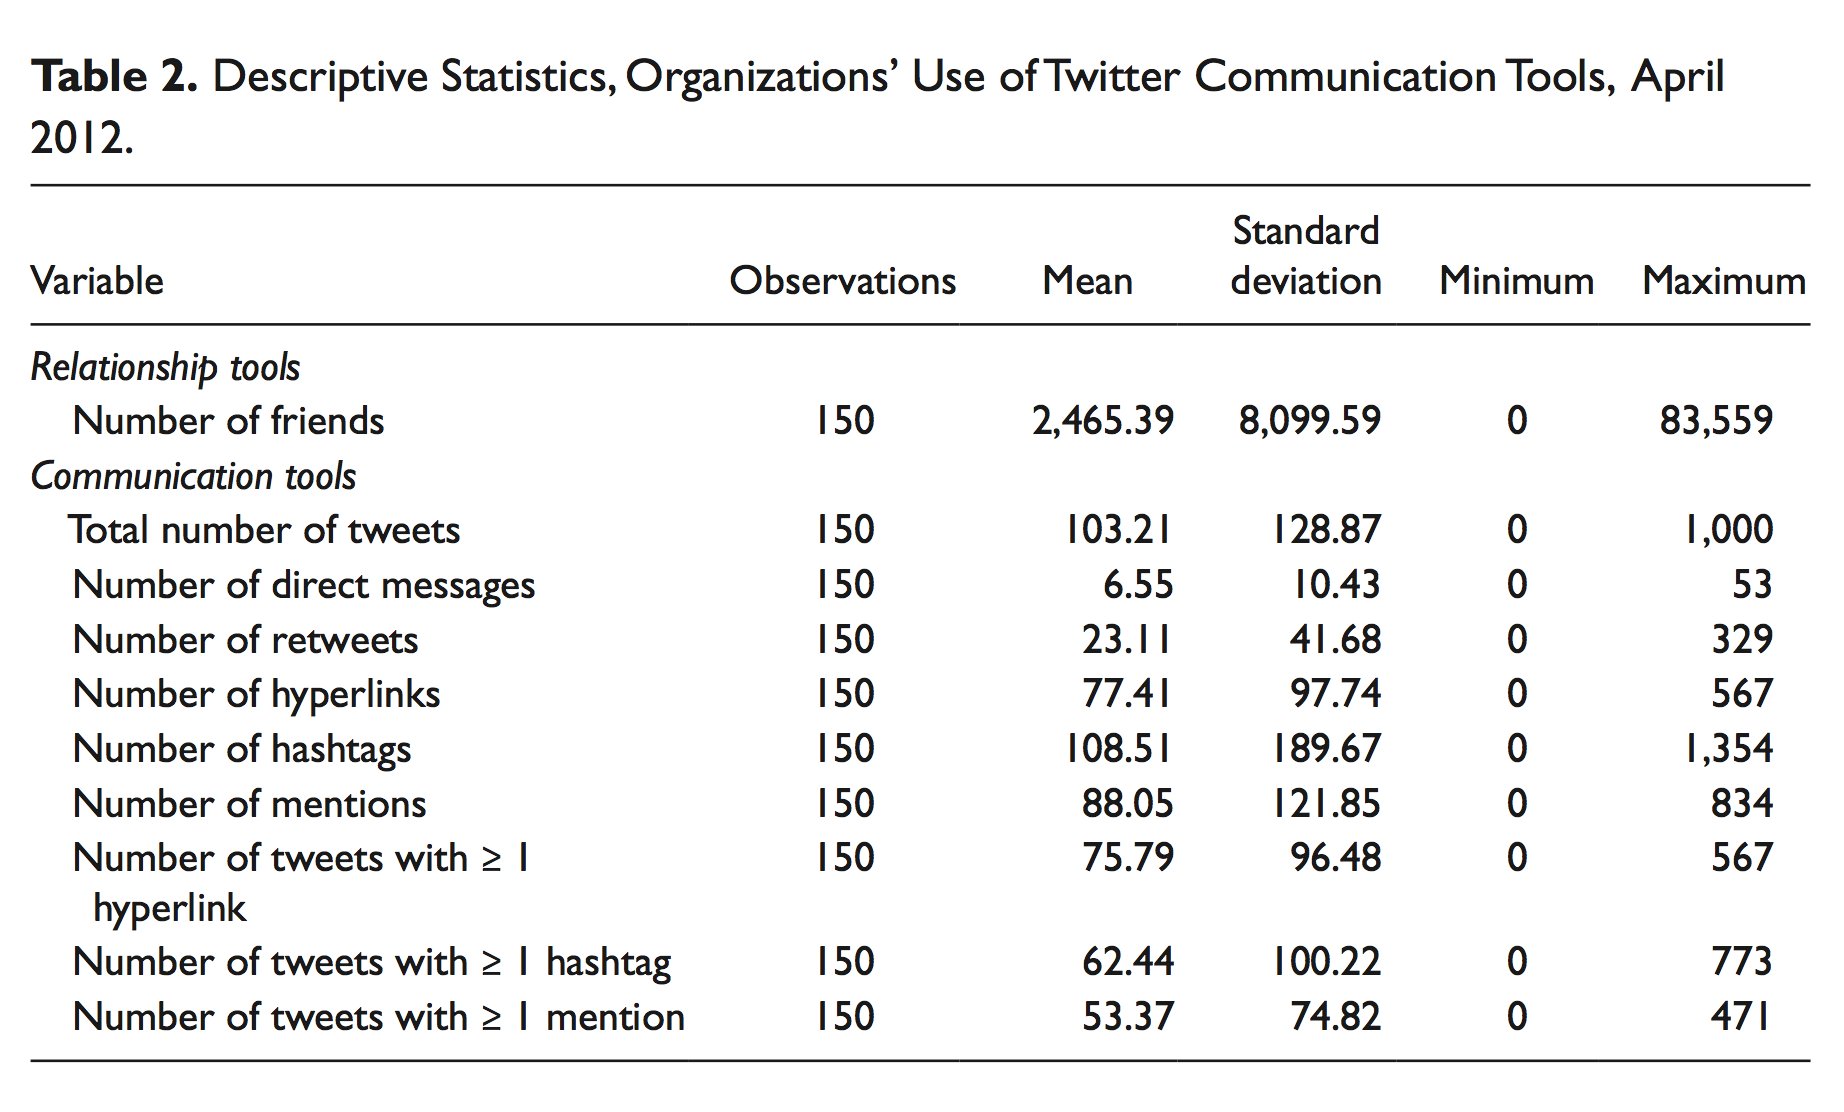

In [59]:
from IPython.display import Image
Image(width=750, filename='Descriptive Statistics Table.png') 

<br>
# Chapter 6: Producing a Summary Statistics Table

As per normal, we will first import several necessary Python packages and set some options for viewing the data. As with prior chapters, we will be using the <a href="http://pandas.pydata.org/">Python Data Analysis Library,</a> or <i>PANDAS</i>, extensively for our data manipulations.

### Import packages and set viewing options

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [3]:
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)

I'm using version 0.16.2 of PANDAS

In [5]:
pd.__version__

'0.16.2'

<br>I like suppressing scientific notation in my numbers. So, if you'd rather see "0.48" than "4.800000e-01", then run the following line. Note that this does not change the actual values. For outputting to CSV we'll have to run some additional code later on.

In [17]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Read in dataframe

In <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%204%20-%20Analyzing%20Hashtags.ipynb" target="_blank">Chapter 4</a> we created a version of the dataframe that omitted all tweets that were retweets, allowing us to focus only on original messages sent by the 41 Twitter accounts. In <a href="http://nbviewer.ipython.org/github/gdsaxton/PANDAS/blob/master/Chapter%205%20-%20Generating%20New%20Variables.ipynb" target="_blank">Chapter 5</a> we then added 6 new variables to this dataset. Let's now open this saved file. As we can see in the operations below this dataframe contains 60 variables for 26,257 tweets.

In [32]:
df = pd.read_pickle('Original 2013 CSR Tweets with 3 binary variables.pkl')
print "# of variables in dataframe:", len(df.columns)
print  "# of tweets in dataframe:", len(df)
df.head(2)

# of variables in dataframe: 60
# of tweets in dataframe: 26257


,rowid,query,tweet_id_str,inserted_date,language,coordinates,retweeted_status,created_at,month,year,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_favourites_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,favorite_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic,num_characters,num_words,retweeted_user,retweeted_user_description,retweeted_user_screen_name,retweeted_user_followers_count,retweeted_user_listed_count,retweeted_user_statuses_count,retweeted_user_location,retweeted_tweet_created_at,Fortune_2012_rank,Company,CSR_sustainability,specific_project_initiative_area,English,RTs_binary,favorites_binary,hashtags_binary,mentions_binary,URLs_binary
0,67340,humanavitality,306897327585652736,2014-03-09 13:46:50.222857,en,NaN,NaN,2013-02-27 22:43:19.000000,2,2013,@louloushive (Tweet 2) We encourage other empl...,humanavitality,274041023,2859,440,38,25,1766,This is the official Twitter account for Human...,NaN,Tue Mar 29 16:23:02 +0000 2011,0,0,NaN,0,NaN,0,louloushive,1,louloushive,306218267737989120.00,web,NaN,nan,NaN,NaN,NaN,0,0,0,121,19,nan,NaN,NaN,nan,nan,nan,NaN,NaN,79,Humana,0,1,1.00,0,0,0,1,0
1,39454,FundacionPfizer,308616393706844160,2014-03-09 13:38:20.679967,es,NaN,NaN,2013-03-04 16:34:17.000000,3,2013,¿Sabes por qué la #vacuna contra la #neumonía ...,FundacionPfizer,188384056,2464,597,50,11,2400,Noticias sobre Responsabilidad Social y Fundac...,México,Wed Sep 08 16:14:11 +0000 2010,1,0,NaN,0,"vacuna, neumonía",2,NaN,0,NaN,nan,web,NaN,nan,NaN,NaN,NaN,0,0,0,138,20,nan,NaN,NaN,nan,nan,nan,NaN,NaN,40,Pfizer,0,1,0.00,1,0,1,0,0


<br>

List all the columns in the DataFrame

In [8]:
df.columns

Index([u'rowid', u'query', u'tweet_id_str', u'inserted_date', u'language',
       u'coordinates', u'retweeted_status', u'created_at', u'month', u'year',
       u'content', u'from_user_screen_name', u'from_user_id',
       u'from_user_followers_count', u'from_user_friends_count',
       u'from_user_listed_count', u'from_user_favourites_count',
       u'from_user_statuses_count', u'from_user_description',
       u'from_user_location', u'from_user_created_at', u'retweet_count',
       u'favorite_count', u'entities_urls', u'entities_urls_count',
       u'entities_hashtags', u'entities_hashtags_count', u'entities_mentions',
       u'entities_mentions_count', u'in_reply_to_screen_name',
       u'in_reply_to_status_id', u'source', u'entities_expanded_urls',
       u'entities_media_count', u'media_expanded_url', u'media_url',
       u'media_type', u'video_link', u'photo_link', u'twitpic',
       u'num_characters', u'num_words', u'retweeted_user',
       u'retweeted_user_description', u'retweet

### Create Sub-Set of DataFrame with only Desired Variables

You might not want to include all of your variables in the summary statistics table. When you're dealing with a dataset with a lot of columns, I find the easiest way is to output the column names to a list, copy and paste the output into another cell, then delete the columns you don't want.

In [33]:
print df.columns.tolist()

['rowid', 'query', 'tweet_id_str', 'inserted_date', 'language', 'coordinates', 'retweeted_status', 'created_at', 'month', 'year', 'content', 'from_user_screen_name', 'from_user_id', 'from_user_followers_count', 'from_user_friends_count', 'from_user_listed_count', 'from_user_favourites_count', 'from_user_statuses_count', 'from_user_description', 'from_user_location', 'from_user_created_at', 'retweet_count', 'favorite_count', 'entities_urls', 'entities_urls_count', 'entities_hashtags', 'entities_hashtags_count', 'entities_mentions', 'entities_mentions_count', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'source', 'entities_expanded_urls', 'entities_media_count', 'media_expanded_url', 'media_url', 'media_type', 'video_link', 'photo_link', 'twitpic', 'num_characters', 'num_words', 'retweeted_user', 'retweeted_user_description', 'retweeted_user_screen_name', 'retweeted_user_followers_count', 'retweeted_user_listed_count', 'retweeted_user_statuses_count', 'retweeted_user_location', 'r

<br>I've copy and pasted the above output into the cell below and kept only a subset of the columns. Note the use of the single square brackets above to denote column names but the double square brackets below. In PANDAS the double brackets refer to <i>dataframes</i>; in the following line I am thus saying I want my dataframe `df` to be limited to the columns listed on the right-hand side of the equation.

In [34]:
df = df[['content','from_user_screen_name','from_user_followers_count','from_user_listed_count','from_user_statuses_count','retweet_count','favorite_count','entities_urls_count','entities_hashtags_count','entities_mentions_count',
 'num_characters','Company', 'English','RTs_binary','favorites_binary','hashtags_binary','mentions_binary',
 'URLs_binary']]
print "# of variables in dataframe:", len(df.columns)
print  "# of tweets in dataframe:", len(df)
df.head(2)

# of variables in dataframe: 18
# of tweets in dataframe: 26257


,content,from_user_screen_name,from_user_followers_count,from_user_listed_count,from_user_statuses_count,retweet_count,favorite_count,entities_urls_count,entities_hashtags_count,entities_mentions_count,num_characters,Company,English,RTs_binary,favorites_binary,hashtags_binary,mentions_binary,URLs_binary
0,@louloushive (Tweet 2) We encourage other empl...,humanavitality,2859,38,1766,0,0,0,0,1,121,Humana,1.00,0,0,0,1,0
1,¿Sabes por qué la #vacuna contra la #neumonía ...,FundacionPfizer,2464,50,2400,1,0,0,2,0,138,Pfizer,0.00,1,0,1,0,0


<br> 

As you can see above, we now have a dataframe with only 18 variables.

### Generate Summary Statistics 

The `describe` function is the basic way to produce summary statistics for all the variables in your dataframe.

In [35]:
df.describe()

,from_user_followers_count,from_user_listed_count,from_user_statuses_count,retweet_count,favorite_count,entities_urls_count,entities_hashtags_count,entities_mentions_count,num_characters,English,RTs_binary,favorites_binary,hashtags_binary,mentions_binary,URLs_binary
count,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00
mean,48397.00,533.32,5190.04,3.83,1.52,0.63,1.01,0.96,111.11,0.97,0.55,0.33,0.63,0.61,0.62
std,103199.48,684.03,4004.43,42.94,15.28,0.50,1.01,1.14,29.89,0.17,0.50,0.47,0.48,0.49,0.49
min,58.00,8.00,9.00,0.00,0.00,0.00,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4426.00,209.00,2311.00,0.00,0.00,0.00,0.00,0.00,94.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,6401.00,253.00,4231.00,1.00,0.00,1.00,1.00,1.00,122.00,1.00,1.00,0.00,1.00,1.00,1.00
75%,37586.00,748.00,6324.00,2.00,1.00,1.00,2.00,1.00,135.00,1.00,1.00,1.00,1.00,1.00,1.00
max,424892.00,4605.00,16594.00,3719.00,1150.00,4.00,9.00,11.00,159.00,1.00,1.00,1.00,1.00,1.00,1.00


<br> 

If you'd like to see the help for the describe function use the question mark.

In [49]:
DataFrame.describe?

<br>

Use the <i>dir</i> function to get an alphabetical listing of valid names (attributes) in an object.

In [38]:
print dir(df.describe())

['English', 'RTs_binary', 'T', 'URLs_binary', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__idiv__', '__imul__', '__init__', '__invert__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__le__', '__len__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__setitem__', '__setstate__

<br>

CHANGE TO TWO DECIMALS (n.b. - This step is not necessary if you have run the display.float_format command earlier)

In [39]:
np.round(df.describe(), 2)

,from_user_followers_count,from_user_listed_count,from_user_statuses_count,retweet_count,favorite_count,entities_urls_count,entities_hashtags_count,entities_mentions_count,num_characters,English,RTs_binary,favorites_binary,hashtags_binary,mentions_binary,URLs_binary
count,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00,26257.00
mean,48397.00,533.32,5190.04,3.83,1.52,0.63,1.01,0.96,111.11,0.97,0.55,0.33,0.63,0.61,0.62
std,103199.48,684.03,4004.43,42.94,15.28,0.50,1.01,1.14,29.89,0.17,0.50,0.47,0.48,0.49,0.49
min,58.00,8.00,9.00,0.00,0.00,0.00,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4426.00,209.00,2311.00,0.00,0.00,0.00,0.00,0.00,94.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,6401.00,253.00,4231.00,1.00,0.00,1.00,1.00,1.00,122.00,1.00,1.00,0.00,1.00,1.00,1.00
75%,37586.00,748.00,6324.00,2.00,1.00,1.00,2.00,1.00,135.00,1.00,1.00,1.00,1.00,1.00,1.00
max,424892.00,4605.00,16594.00,3719.00,1150.00,4.00,9.00,11.00,159.00,1.00,1.00,1.00,1.00,1.00,1.00


<br>

NOW LET'S TRANSPOSE THE OUTPUT -- necessary for a more typical social scientific presentation of the data. Note how only 15 variables are shown. These are our numerical variables. The categorical variables `content`, `from_user_screen_name`, and `Company` are not shown.

In [62]:
np.round(df.describe(), 2).T

#ALTERNATIVE WAY OF WRITING ABOVE
#np.round(df.describe(), 2).transpose()

,count,mean,std,min,25%,50%,75%,max
from_user_followers_count,26257.00,48397.00,103199.48,58.00,4426.00,6401.00,37586.00,424892.00
from_user_listed_count,26257.00,533.32,684.03,8.00,209.00,253.00,748.00,4605.00
from_user_statuses_count,26257.00,5190.04,4004.43,9.00,2311.00,4231.00,6324.00,16594.00
retweet_count,26257.00,3.83,42.94,0.00,0.00,1.00,2.00,3719.00
favorite_count,26257.00,1.52,15.28,0.00,0.00,0.00,1.00,1150.00
entities_urls_count,26257.00,0.63,0.50,0.00,0.00,1.00,1.00,4.00
entities_hashtags_count,26257.00,1.01,1.01,0.00,0.00,1.00,2.00,9.00
entities_mentions_count,26257.00,0.96,1.14,0.00,0.00,1.00,1.00,11.00
num_characters,26257.00,111.11,29.89,9.00,94.00,122.00,135.00,159.00
English,26257.00,0.97,0.17,0.00,1.00,1.00,1.00,1.00


<br>

We won't typically want the percentile columns in a social scientific publication. Supposedly, in version 0.16 of PANDAS, you can use 'percentiles=None' with the describe command to omit the percentiles. In version 0.16 as well as earlier versions of PANDAS we can alternatively select only those columns we want, then output to CSV.

In [41]:
np.round(df.describe(), 2).T[['count','mean', 'std', 'min', 'max']]

,count,mean,std,min,max
from_user_followers_count,26257.00,48397.00,103199.48,58.00,424892.00
from_user_listed_count,26257.00,533.32,684.03,8.00,4605.00
from_user_statuses_count,26257.00,5190.04,4004.43,9.00,16594.00
retweet_count,26257.00,3.83,42.94,0.00,3719.00
favorite_count,26257.00,1.52,15.28,0.00,1150.00
entities_urls_count,26257.00,0.63,0.50,0.00,4.00
entities_hashtags_count,26257.00,1.01,1.01,0.00,9.00
entities_mentions_count,26257.00,0.96,1.14,0.00,11.00
num_characters,26257.00,111.11,29.89,9.00,159.00
English,26257.00,0.97,0.17,0.00,1.00


<br>
### Save the Output of the Table as a CSV File

Once you get more comfortable with Python and PANDAS you can combine your commands. For instance, we can simultaenously run our summary statistics and output the results to a CSV file.

In [43]:
#WITH FOUR DECIMAL PLACES (DEFAULT)
df.describe().transpose().to_csv('summary stats.csv', sep=',')

<br>
For a typical social scientific publication, we would not need the percentile columns. We can instead select only those columns we want, then output to CSV.

In [51]:
df.describe().transpose()[['count','mean', 'std', 'min', 'max']].to_csv('summary stats.csv', sep=',')

<br>
The problem with the above output is that more than 2 decimal places are showing. If you want only two, then run the following version.

In [52]:
#WITH TWO DECIMAL PLACES
np.round(df.describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_csv('summary stats.csv', sep=',')

<br>

Now you have a CSV file containing the columns you'll need for a typical Summary Statistics or Descriptive Statistics table for a submission to a social science journal. You likely won't want all of the columns in the final table, so I would probably open up the CSV file in Excel, delete unwanted variables, then copy and paste into Word. At that point you just need some formatting for aesthetics. If you do want to select which specific variables to include, you can specify the columns like this.

In [54]:
cols = ['retweet_count','RTs_binary']
np.round(df[cols].describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_csv('summary stats (partial).csv', sep=',')

### Outputting to LaTeX

In some disciplines (e.g., Political Science, Engineering, Computer Science, Accounting, Finance, Economics) it is common to use LaTeX rather than Word. PANDAS has excellent LaTeX capabilities. For instance, the first of the following three lines of code shows how to output to a `*`.tex file rather than CSV, while the second shows what the LaTeX code looks like. The third imports an image of what the table looks like once it's rendered in TeXShop.

In [64]:
np.round(df.describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_latex('summary stats.tex')

In [67]:
print np.round(df.describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &    count &     mean &       std &   min &       max \\
\midrule
from\_user\_followers\_count & 26257.00 & 48397.00 & 103199.48 & 58.00 & 424892.00 \\
from\_user\_listed\_count    & 26257.00 &   533.32 &    684.03 &  8.00 &   4605.00 \\
from\_user\_statuses\_count  & 26257.00 &  5190.04 &   4004.43 &  9.00 &  16594.00 \\
retweet\_count             & 26257.00 &     3.83 &     42.94 &  0.00 &   3719.00 \\
favorite\_count            & 26257.00 &     1.52 &     15.28 &  0.00 &   1150.00 \\
entities\_urls\_count       & 26257.00 &     0.63 &      0.50 &  0.00 &      4.00 \\
entities\_hashtags\_count   & 26257.00 &     1.01 &      1.01 &  0.00 &      9.00 \\
entities\_mentions\_count   & 26257.00 &     0.96 &      1.14 &  0.00 &     11.00 \\
num\_characters            & 26257.00 &   111.11 &     29.89 &  9.00 &    159.00 \\
English                   & 26257.00 &     0.97 &      0.17 &  0.00 &      1.00 \\
RTs\_binary                & 26257.00 &     0.55 &

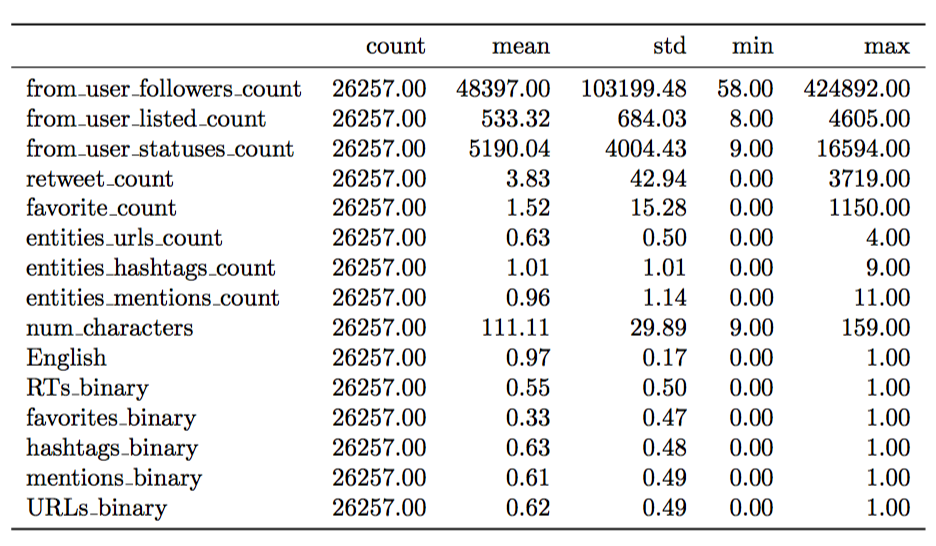

In [70]:
Image(width=600, filename='Descriptive Statistics Table (LaTeX).png') 

<br>In this tutorial we have covered how to generate a summary statistics table in preparation for further analyses and for submitting your work to scholarly outlets. In the following tutorials I'll introduce you to how to analyze audience reaction to the companies' tweets as well as how to test your hypotheses using logistic regression.

For more Notebooks as well as additional Python and Big Data tutorials, please visit http://social-metrics.org or follow me on Twitter <a href='https://twitter.com/gregorysaxton'>@gregorysaxton</a><br>